# Viaje Zuber

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

***DICCIONARIO DE DATOS*** 

`company_name` : nombre de la empresa de taxis

`trips_amount` : el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017

`dropoff_location_name` : barrios de Chicago donde finalizaron los viajes

`average_trips` : el promedio de viajes que terminaron en cada barrio en noviembre de 2017

`start_ts` : fecha y hora de recogida

`weather_conditions` : condiciones climáticas en el momento en el que comenzó el viaje

`duration_seconds` : duración del viaje en segundos

## Inicialización

In [24]:
#Se carga las librerias
import pandas as pd
import seaborn as sn
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos


In [25]:
# Carga los archivos de datos en diferentes DataFrames
try:
    empresa_viaje = pd.read_csv('/datasets/project_sql_result_01.csv')
except:
    empresa_viaje = pd.read_csv(r'..\datasets\project_sql_result_01.csv')

In [26]:
try:
    viaje_barrio = pd.read_csv('/datasets/project_sql_result_04.csv')
except:
    viaje_barrio = pd.read_csv(r'..\datasets\project_sql_result_04.csv')

In [27]:
try:
    clima_dato = pd.read_csv('/datasets/project_sql_result_07.csv')
except:
    clima_dato = pd.read_csv(r'..\datasets\project_sql_result_07.csv')

# Prepara datos


## Empresa


In [28]:
# Imprime la información general/resumida sobre el DataFrame de la empresa
empresa_viaje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [29]:
# Imprime una muestra de datos
empresa_viaje.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


## Viaje

In [30]:
# Imprime la información general/resumida sobre el DataFrame de viaje
viaje_barrio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [31]:
# Imprime una muestra de datos
viaje_barrio.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Clima

In [32]:
# Imprime la información general/resumida sobre el DataFrame del clima
clima_dato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [33]:
# Imprime una muestra de datos
clima_dato.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


### Corregir datos

In [34]:
#cambiar el tipo de dato de objeto a datetime
clima_dato['start_ts'] = pd.to_datetime(clima_dato['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [35]:
#verificacion previa para convertir de float a entero
np.array_equal(clima_dato['duration_seconds'], clima_dato['duration_seconds'].astype('int'))

True

In [36]:
#Cambio a entero la columna duracion
clima_dato['duration_seconds'] = clima_dato['duration_seconds'].astype('int')

In [37]:
#se imprime nuevamente la informacion de la tabla clima 
clima_dato.info()
clima_dato.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


La columna **start_ts** era de tipo *object*, se realizo el cambio a tipo *datetime*; también a la columna **duration_seconds** se cambio el tipo de dato *float* a *int*.

# Analizar datos

In [38]:
# principales 10 barrios en términos de finalización
barrios_finaliz = viaje_barrio.sort_values(by = 'average_trips', ascending = False).head(10)
barrios_finaliz

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


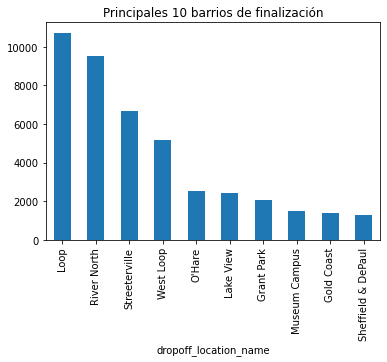

In [39]:
barrios_finaliz.plot(x = 'dropoff_location_name', y = 'average_trips', kind = 'bar', legend = False,
                     title = 'Principales 10 barrios de finalización')
plt.show()

El cuadro anterior presenta los 10 principales barrios donde se termina un viaje, siendo el mayor el barrio 'Loop'.

In [40]:
graph_empresa_viaje = empresa_viaje.sort_values(by = 'trips_amount', ascending = False)
graph_empresa_viaje

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


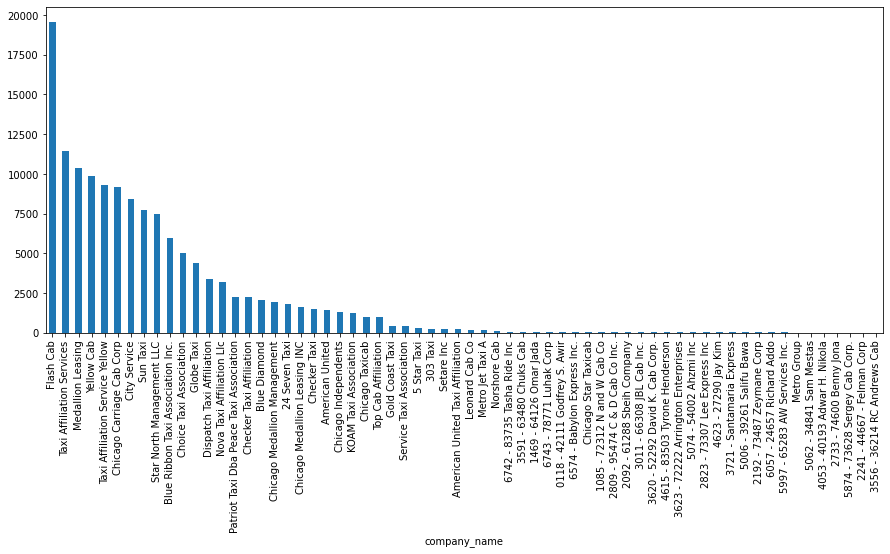

In [41]:
graph_empresa_viaje.plot(x = 'company_name', y = 'trips_amount', kind = 'bar', figsize = [15,6],legend = False)
plt.show()

La grafica muestra la cantidad de viajes por empresa de taxis, siendo el mas usado para este servicio 'Flash Cab'.

# Prueba de hipótesis

A continuación se propondra una hipotesis que se rechazará o no, esta en referencia a si la duracion de los viajes de los dias sabados soleados y lluviosos son los mismos.

In [42]:
#muestra de 5 primeros
clima_dato.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [43]:
#condiciones climaticas, donde Bad es un dia lluvioso
clima_dato['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [44]:
#agregamos una columna de dia que muestra los dias sabados
clima_dato['dia'] = clima_dato['start_ts'].dt.weekday
clima_dato.head()

,start_ts,weather_conditions,duration_seconds,dia
0,2017-11-25 16:00:00,Good,2410,5
1,2017-11-25 14:00:00,Good,1920,5
2,2017-11-25 12:00:00,Good,1543,5
3,2017-11-04 10:00:00,Good,2512,5
4,2017-11-11 07:00:00,Good,1440,5


Los datos anteriores pertenecen todos a los dias sabados, con condicion climatica buena o mala.

In [45]:
#filtramos por un dia Good

good_clima = clima_dato[clima_dato['weather_conditions'] == 'Good']['duration_seconds']

#filtramos por un dia Bad(lluvioso)

bad_clima = clima_dato[clima_dato['weather_conditions'] == 'Bad']['duration_seconds']


**HO = La duración promedio de los viajes los dia sabados lluviosos y soleados son iguales**

**H1 = La duración promedio de los viajes los dia sabados lluviosos y soleados NO son iguales**

In [46]:
#Hipotesis sobre la igualdad de las medias 
#de dos poblaciones

alpha = 0.05 #nivel de significancia
results = st.ttest_ind(good_clima, bad_clima)
valorp = results.pvalue
print(valorp)

#condicional para comparar el p con el alpha
if valorp<alpha:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

6.517970327099473e-12
Se rechaza la hipotesis nula


Al caer en la zona crítica se rechaza la hipótesis nula, es decir que es muy poco probable que la duracion promedio de los viajes los dias lluviosos y soleados sean iguales, al menos con los datos que tenemos.

# Conclusiones

1. Se realizo cambios en los tipos de datos que fueron necesario para filtrar de manera adecuada la tabla sobre la condición climatica.

2. Se encontro que el barrio 'Loop' es uno de los lugares de mayor cantidad de finalizacion de un viaje. Además, la empresa 'Flash Cab' es la empresa de taxi con mayor cantidades de viajes realizados, le siguen Taxi Afiliattion, Medallion y Yellow Cab.

3. Se rechazó la hipotesis nula de que la duracion promedio de la duracion de los viajes de los sabados con condicion climatica 'Good' y 'Bad'(lluvioso) son iguales, con los datos presentes se llega a lo expuesto.